In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr

# Add src/ to Python path
project_root = Path.cwd().parent  # assuming notebook is inside notebooks/
src_path = project_root / "src"
sys.path.insert(0, str(src_path))

# Now you can import your module
from data_src.gridded_data_sources.cetb import CETBScene
from data_src.gridded_data_sources.era5 import ERA5Scene

from utils.grid_utils import Grid

In [7]:
cetb_scene = CETBScene.from_files(r"C:\Users\ehate\Desktop\ASP\ASP_code_projects\raw_data\CETB_AMSR2\2022-04\NSIDC0630_SIR_EASE2_N3.125km_GCOMW1_AMSR2_E_36H_20220401_2409032033_v2.0.nc")
cetb_scene.modify_extent([-4500000, -4500000, 4500000, 4500000])

era5_scene = ERA5Scene.from_dir(r"C:\Users\ehate\Desktop\ASP\ASP_code_projects\raw_data\ERA5_daily_raw_v2\2022_04")

cetb_scene.regrid(era5_scene.grid, method='linear')
scene = cetb_scene + era5_scene
scene

<xarray.Dataset> Size: 22MB
Dimensions:    (time: 1, longitude: 1440, latitude: 181)
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-04-01
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float64 1kB 90.0 89.75 89.5 89.25 ... 45.5 45.25 45.0
Data variables: (12/21)
    36H        (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 181, 1440), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    e          (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    ...         ...
    ssrd       (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    strd       (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    tciw       (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    tclw       (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    tcwv       (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 91, 720), meta=np.ndarray>

In [4]:
scene.data['36H']

<xarray.DataArray '36H' (time: 1, y: 2880, x: 2880)> Size: 33MB
dask.array<getitem, shape=(1, 2880, 2880), dtype=float32, chunksize=(1, 1440, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-04-01
  * y        (y) float64 23kB 4.498e+06 4.495e+06 ... -4.495e+06 -4.498e+06
  * x        (x) float64 23kB -4.498e+06 -4.495e+06 ... 4.495e+06 4.498e+06
Attributes: (12/17)
    ancillary_variables:                 TB_num_samples TB_time Incidence_ang...
    standard_name:                       brightness_temperature
    long_name:                           SIR TB
    units:                               K
    valid_range:                         [ 5000 35000]
    packing_convention:                  netCDF
    ...                                  ...
    measurement_response_threshold_dB:   -8.0
    measurement_search_bounding_box_km:  75.0
    temporal_division:                   Evening
    temporal_division_local_start_time:  8.0
    temporal_division_local_end_time:    20.0
    frequency_and_polarization:          36H

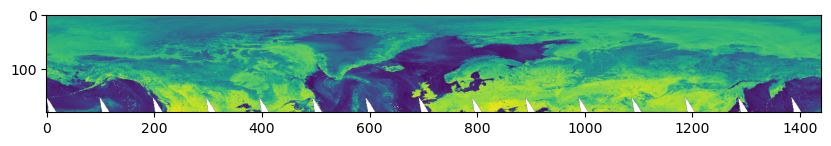

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(scene.data['36H'][0].values, cmap='viridis')

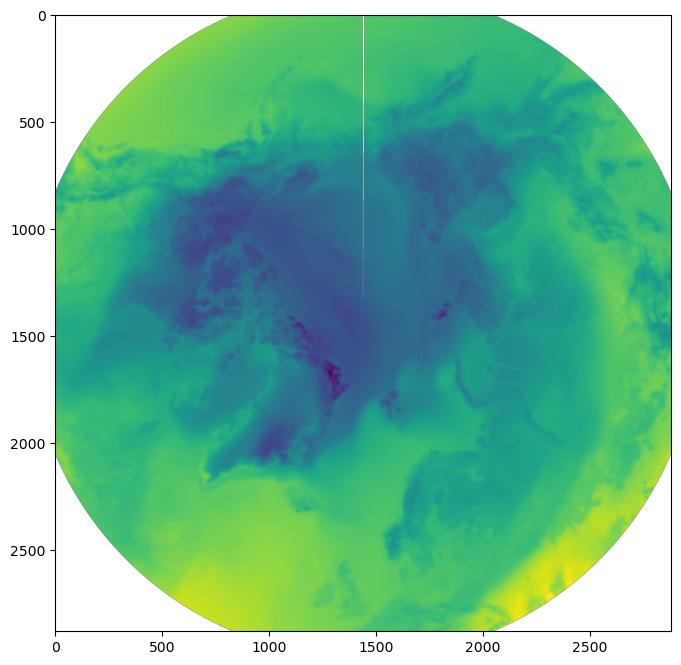

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(scene.data['t2m'][0].values.T, cmap='viridis')